<a href="https://colab.research.google.com/github/DiegoRomanCortes/AED/blob/master/PilaArena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Enunciado
[Tarea 1](https://www.u-cursos.cl/ingenieria/2020/1/CC3001/1/tareas/r/CC3001-Tarea1.pdf)

#Introducción

Este notebook tiene por objetivo modelar de manera simplificada el derrumbe de una torre de arena. Para ello, se utiliza una matriz que simula los espacios que usaría cada montón de granitos, poniendo la pila inicial en el centro de la misma. La regla es que si la pila tiene 4 o más granitos, éstos sean traspazados de forma equitativa a las posiciones cardinales adyacentes.

#Parte 1

Primero se importan las librerías para manejar arreglos y para graficar.

In [0]:
from matplotlib import pyplot as plt
import numpy as np

Luego se le pide la cantidad inicial de arena al usuario.

In [2]:
N = input("Inserte número de granitos de arena a apilar: ")

Inserte número de granitos de arena a apilar: 1000


El número $N$ ingresado se convirtirá a `int`, pues originalmente era un `String`. La matriz deberá ser de $L$ x $L$ idealmente para que el número total de elementos en la matriz sea precisamente $N$. El valor de $L$ será el del diámetro de un círculo que contiene en promedio $2$ granitos de arena por posición, es decir $L = 2 * \sqrt{\frac{\frac{N}{\pi}}{2}} = \sqrt{\frac{2N}{\pi}}$. Como $L$ no es necesariamente entero, se castea como tal con `L = int(L)`. 

Importante es notar que modelar la figura como un círculo se ha hecho a posteriori. En un principio, $L = \sqrt{N}$, lo que permitió observar luego la forma circular resultante del problema.



In [0]:
N = int(N)
L = np.sqrt(2*N/np.pi)
L = int(L)

Naturalmente, es conveniente inicializar una matriz de ceros $M$ con la forma que se vió anteriormente. La posición mediana está en $M_{\frac{L}{2},\frac{L}{2}}$, por lo que allí será asignado el valor $N$ ingresado.

In [0]:
mat = np.zeros((L,L))
mat[L//2][L//2] = N

El algoritmo más fácil de programar es el de fuerza bruta. Éste recorre la matriz $N$ veces, haciendo la repartición equitativa cada vez que se detecte algún valor $M_{i,j} >= 4$. También se contará las veces que se aplica la regla de derrumbe.

In [0]:
ciclo_1 = 0 

for n in range(N):
  i = 0
  while i < len(mat):
    j = 0
    while j  < len(mat[0]):
      if mat[i][j] >= 4: #regla
        ciclo_1 += 1
        mat[i][j] -= 4
        mat[i-1][j] += 1
        mat[i+1][j] += 1
        mat[i][j-1] += 1
        mat[i][j+1] += 1
      j += 1
    i += 1

Número de veces que se aplicó la regla:  18226


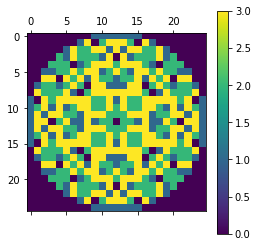

In [6]:
print("Número de veces que se aplicó la regla: ", ciclo_1)
plt.matshow(mat)
plt.colorbar()
plt.show()

#Parte 2
Notemos que el algoritmo anterior admite una pequeña optimización, pues reparte los granos de arena de a 4 unidades. Se implementará por tanto una porción de código que reparta todo lo que se pueda (mayor múltiplo de 4) a sus vecinos cardinales. 

In [19]:
N = input("Inserte número de granitos de arena a apilar: ")
N = int(N)
L = np.sqrt(2*N/np.pi)
L = int(L)

Inserte número de granitos de arena a apilar: 10000


In [0]:
mat = np.zeros((L,L))
mat[L//2][L//2] = N

Nuevamente, se guarda la cantidad de veces en las que se aplica la regla. 

In [0]:
ciclo_2 = 0

for n in range(N):
  i = 0
  while i < len(mat):
    j = 0
    while j < len(mat[0]):
      if mat[i][j] >= 4:
        ciclo_2 += 1
        granitos = mat[i][j] - mat[i][j] % 4 #notar que si granitos == 4 recuperamos programa anterior
        mat[i][j] -= granitos
        mat[i-1][j] += granitos / 4
        mat[i+1][j] += granitos / 4
        mat[i][j-1] += granitos / 4
        mat[i][j+1] += granitos / 4
      j += 1
    i += 1

Número de veces que se aplicó la regla:  1196817


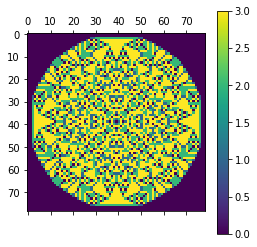

In [22]:
print("Número de veces que se aplicó la regla: ", ciclo_2)
plt.matshow(mat)
plt.colorbar()
plt.show()

#Parte 3
Se ejecutarán ahora ambos algoritmos para distintos valores de $N$. El gráfico resultante permitirá comparar ambos métodos.

Estado final para $N = 128$

![128](https://github.com/DiegoRomanCortes/AED/blob/master/128.png?raw=true)

Estado final para $N = 25000$

![25000](https://github.com/DiegoRomanCortes/AED/blob/master/25000.png?raw=true)

![texto alternativo](https://github.com/DiegoRomanCortes/AED/blob/master/alg25000.png?raw=true)

##Código para leer tabla

In [17]:
import pandas as pd
from google.colab import data_table #así se despliega completamente el DataFrame (sacado de los fragmento de código de colab)

archivo = "https://github.com/DiegoRomanCortes/AED/blob/master/alg25000.csv?raw=true"
df = pd.read_csv(archivo)
df = df.drop("Unnamed: 0", axis = 1) #al guardarla, lo hace con los índices

razon = df['Algoritmo 1']/df['Algoritmo 2']
razon = razon.mean()
razon = razon*100//1/100
print("El algoritmo 1 ejecuta en promedio", razon, "veces más la regla de derrumbe que el algoritmo 2")

data_table.DataTable(df, include_index=False, num_rows_per_page=50)

El algoritmo 1 ejecuta en promedio 1.53 veces más la regla de derrumbe que el algoritmo 2


,Número de granos de arena,Algoritmo 1,Algoritmo 2
0,128,342,227
1,635,7487,4793
2,1143,24458,16078
3,1650,49881,32492
4,2158,82730,53135
5,2665,133789,87992
6,3173,186435,122485
7,3681,254326,167636
8,4188,326938,214903
9,4696,401556,262137


##Código para graficar

In [0]:
def alg_1(N, mat):
  ciclo_1 = 0 

  i = 0
  while i < len(mat):
    j = 0
    while j  < len(mat[0]):
      if mat[i][j] >= 4: #regla
        ciclo_1 += 1
        mat[i][j] -= 4
        mat[i-1][j] += 1
        mat[i+1][j] += 1
        mat[i][j-1] += 1
        mat[i][j+1] += 1
        i-=1
        j-=1
      else: j += 1
    i += 1
  return(mat, ciclo_1)

def alg_2(N, mat):
  ciclo_2 = 0

  i = 0
  while i < len(mat):
    j = 0
    while j < len(mat[0]):
      if mat[i][j] >= 4:
        ciclo_2 += 1
        granitos = mat[i][j] - mat[i][j] % 4 #notar que si granitos == 4 recuperamos programa anterior
        mat[i][j] -= granitos
        mat[i-1][j] += granitos / 4
        mat[i+1][j] += granitos / 4
        mat[i][j-1] += granitos / 4
        mat[i][j+1] += granitos / 4
        i -= 1
        j-= 1
      else: j += 1
    i += 1
  return(mat, ciclo_2)

def corre(alg, N):
  N = int(N)
  L = 2*np.sqrt(N/np.pi/2)
  L = int(L) + 2
  mat = np.zeros((L,L))
  mat[L//2][L//2] = N
  res = alg(N, mat)
  return res

In [0]:
enes = np.linspace(128,1000,dtype = int) #para graficar de 128 a 25000 demoró toda una tarde, se cambió el valor final para una posterior ejecucución
res_1 = np.zeros(len(enes), dtype = int) 
res_2 = np.zeros(len(enes), dtype = int)

i = 0
while i < len(enes):
  res_1[i] = corre(alg_1, enes[i])[1]
  res_2[i] = corre(alg_2, enes[i])[1]
  i += 1

El algoritmo 1 ejecuta en promedio  1.29 veces más la regla de derrumbe que el algoritmo 2


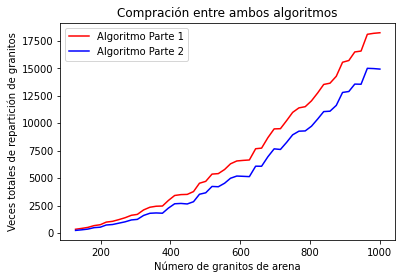

In [14]:
plt.figure()

plt.plot(enes, res_1, 'r', label = "Algoritmo Parte 1")
plt.plot(enes, res_2, 'b', label = 'Algoritmo Parte 2')

escalar = res_1/res_2
e = escalar.mean()
e = 100*e//1/100
print("El algoritmo 1 ejecuta en promedio",e, "veces más la regla de derrumbe que el algoritmo 2.")

plt.legend()

plt.title("Compración entre ambos algoritmos")
plt.xlabel("Número de granitos de arena")
plt.ylabel("Veces totales de repartición de granitos")
plt.show()

##Código para guardar tabla

Este es el código usado para generar el archivo que se lee más arriba. Está comentado para que no interfiera en la ejecución final (revisión de la tarea).

In [0]:
#import pandas as pd
#datos = np.array([enes, res_1, res_2])
#print(datos)
#np.savetxt('algoritmoshasta25000.txt', datos) 
#from google.colab import files
#df = pd.DataFrame({"Número de granos de arena":enes,"Algoritmo 1":res_1, "Algoritmo 2":res_2})

#df.to_csv("alg25000.csv")
#files.download('alg25000.csv')

#Discusiones
Al algoritmo 2 se le ha modificado la regla, de modo que reparta todo su exceso a sus vecinos cardinales (en lugar de hacerlo cada 4 granitos). Esta mejora pretendía reducir considerablemente el tiempo de ejecución, pues se parte con un montón de $N$ granitos de arena en el centro cuya repartición en el primer algoritmo se hacía cada vez que se iniciaba un nuevo ciclo de repartición. 

Dados los datos graficados de ambos algoritmos, se puede extraer que la implementación de la pequeña optimización redujo la cantidad de veces que la regla era aplicada (el primer algoritmo aplica la regla 1.5 veces más que el segundo).

Una posible optimización puede considerar una nueva forma de recorrer la matriz, de modo que aproveche la distribución simétrica del tablero (por ejemplo, cada vez que se aplique la regla que se revise si en los puntos cardinales también se cumple). Así mismo, el tamaño del tablero no es siempre el mínimo posible, lo que ocasiona búsquedas innecesarias.

#Conclusión

El objetivo de este trabajo era simular el derrumbe de una pila de granos de arena a través de una regla simplificada. Si bien no tiene símil con la realidad, los algoritmos programados permiten notar la eficiencia que puede adquirir un programa si el problema a resolver se analiza cuidadosamente de forma tal que se ocupe todo elemento favorable a una mejor ejecución. El cambio entre la Parte 1 y la 2 permitió reducir la aplicación de la regla de derrumbe en un $67 \%$.